## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.231133 -1.261391  1.576497 -0.379503 -1.479122 -1.183317
1 -0.208880 -1.598913 -1.471549  1.468163 -1.351241 -0.063693
2  1.690659  1.502176 -0.866442  1.515903  0.674905  0.529049
3 -1.511054  0.283825  0.257505  1.346182  0.289446 -0.139545
4 -0.840188  1.370978  0.067068 -1.713404  1.537474 -0.641660


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9729670	total: 61.6ms	remaining: 1m 1s
1:	learn: 0.9652230	total: 62.1ms	remaining: 31s
2:	learn: 0.9569519	total: 62.5ms	remaining: 20.8s
3:	learn: 0.9478800	total: 62.9ms	remaining: 15.7s
4:	learn: 0.9390239	total: 63.3ms	remaining: 12.6s
5:	learn: 0.9305276	total: 63.8ms	remaining: 10.6s
6:	learn: 0.9209122	total: 64.2ms	remaining: 9.11s
7:	learn: 0.9126362	total: 64.5ms	remaining: 8s
8:	learn: 0.9045579	total: 64.9ms	remaining: 7.14s
9:	learn: 0.8977163	total: 65.2ms	remaining: 6.46s
10:	learn: 0.8905985	total: 65.7ms	remaining: 5.91s
11:	learn: 0.8818598	total: 66.1ms	remaining: 5.45s
12:	learn: 0.8726391	total: 66.6ms	remaining: 5.05s
13:	learn: 0.8677065	total: 67ms	remaining: 4.72s
14:	learn: 0.8611754	total: 67.3ms	remaining: 4.42s
15:	learn: 0.8541105	total: 67.8ms	remaining: 4.17s
16:	learn: 0.8456744	total: 68.2ms	remaining: 3.94s
17:	learn: 0.8386715	total: 68.5ms	remaining: 3.74s
18:	learn: 0.8306763	total: 68.9ms	remaining: 3.56s

43:	learn: 0.6738563	total: 80.5ms	remaining: 1.75s
44:	learn: 0.6682770	total: 81ms	remaining: 1.72s
45:	learn: 0.6633410	total: 81.5ms	remaining: 1.69s
46:	learn: 0.6586236	total: 81.9ms	remaining: 1.66s
47:	learn: 0.6533702	total: 82.4ms	remaining: 1.63s
48:	learn: 0.6482986	total: 82.8ms	remaining: 1.61s
49:	learn: 0.6423934	total: 83.2ms	remaining: 1.58s
50:	learn: 0.6365434	total: 83.8ms	remaining: 1.56s
51:	learn: 0.6311756	total: 84.2ms	remaining: 1.53s
52:	learn: 0.6267795	total: 84.6ms	remaining: 1.51s
53:	learn: 0.6216926	total: 85ms	remaining: 1.49s
54:	learn: 0.6163139	total: 85.6ms	remaining: 1.47s
55:	learn: 0.6119403	total: 85.9ms	remaining: 1.45s
56:	learn: 0.6069035	total: 86.4ms	remaining: 1.43s
57:	learn: 0.6020488	total: 86.9ms	remaining: 1.41s
58:	learn: 0.5969515	total: 87.2ms	remaining: 1.39s
59:	learn: 0.5927506	total: 87.7ms	remaining: 1.37s
60:	learn: 0.5885575	total: 88.2ms	remaining: 1.36s
61:	learn: 0.5844025	total: 88.7ms	remaining: 1.34s
62:	learn: 0.580

264:	learn: 0.1482452	total: 183ms	remaining: 507ms
265:	learn: 0.1472070	total: 183ms	remaining: 506ms
266:	learn: 0.1462705	total: 184ms	remaining: 504ms
267:	learn: 0.1454119	total: 184ms	remaining: 503ms
268:	learn: 0.1444711	total: 185ms	remaining: 502ms
269:	learn: 0.1439832	total: 185ms	remaining: 500ms
270:	learn: 0.1431412	total: 185ms	remaining: 499ms
271:	learn: 0.1423228	total: 186ms	remaining: 498ms
272:	learn: 0.1413534	total: 186ms	remaining: 496ms
273:	learn: 0.1410115	total: 187ms	remaining: 495ms
274:	learn: 0.1400962	total: 187ms	remaining: 493ms
275:	learn: 0.1394758	total: 187ms	remaining: 492ms
276:	learn: 0.1389253	total: 188ms	remaining: 490ms
277:	learn: 0.1384745	total: 188ms	remaining: 489ms
278:	learn: 0.1375302	total: 189ms	remaining: 487ms
279:	learn: 0.1367141	total: 189ms	remaining: 486ms
280:	learn: 0.1360662	total: 190ms	remaining: 485ms
281:	learn: 0.1354844	total: 190ms	remaining: 484ms
282:	learn: 0.1347147	total: 191ms	remaining: 483ms
283:	learn: 

429:	learn: 0.0641725	total: 264ms	remaining: 350ms
430:	learn: 0.0637600	total: 264ms	remaining: 349ms
431:	learn: 0.0633542	total: 265ms	remaining: 348ms
432:	learn: 0.0629004	total: 265ms	remaining: 347ms
433:	learn: 0.0625062	total: 266ms	remaining: 346ms
434:	learn: 0.0621152	total: 266ms	remaining: 345ms
435:	learn: 0.0616858	total: 266ms	remaining: 345ms
436:	learn: 0.0612647	total: 267ms	remaining: 344ms
437:	learn: 0.0608517	total: 267ms	remaining: 343ms
438:	learn: 0.0604465	total: 267ms	remaining: 342ms
439:	learn: 0.0600491	total: 268ms	remaining: 341ms
440:	learn: 0.0596648	total: 268ms	remaining: 340ms
441:	learn: 0.0592819	total: 269ms	remaining: 339ms
442:	learn: 0.0589095	total: 269ms	remaining: 339ms
443:	learn: 0.0585362	total: 270ms	remaining: 338ms
444:	learn: 0.0581754	total: 270ms	remaining: 337ms
445:	learn: 0.0578136	total: 271ms	remaining: 336ms
446:	learn: 0.0574637	total: 271ms	remaining: 335ms
447:	learn: 0.0571150	total: 272ms	remaining: 335ms
448:	learn: 

654:	learn: 0.0213966	total: 366ms	remaining: 193ms
655:	learn: 0.0212826	total: 367ms	remaining: 192ms
656:	learn: 0.0212414	total: 367ms	remaining: 192ms
657:	learn: 0.0211292	total: 368ms	remaining: 191ms
658:	learn: 0.0210307	total: 368ms	remaining: 191ms
659:	learn: 0.0209230	total: 369ms	remaining: 190ms
660:	learn: 0.0208642	total: 369ms	remaining: 189ms
661:	learn: 0.0207775	total: 370ms	remaining: 189ms
662:	learn: 0.0206628	total: 370ms	remaining: 188ms
663:	learn: 0.0205512	total: 371ms	remaining: 188ms
664:	learn: 0.0204529	total: 371ms	remaining: 187ms
665:	learn: 0.0203528	total: 372ms	remaining: 186ms
666:	learn: 0.0202414	total: 372ms	remaining: 186ms
667:	learn: 0.0201504	total: 372ms	remaining: 185ms
668:	learn: 0.0200412	total: 373ms	remaining: 185ms
669:	learn: 0.0199460	total: 373ms	remaining: 184ms
670:	learn: 0.0198464	total: 374ms	remaining: 183ms
671:	learn: 0.0197532	total: 374ms	remaining: 183ms
672:	learn: 0.0196471	total: 375ms	remaining: 182ms
673:	learn: 

829:	learn: 0.0102443	total: 447ms	remaining: 91.6ms
830:	learn: 0.0102071	total: 448ms	remaining: 91.1ms
831:	learn: 0.0101860	total: 449ms	remaining: 90.6ms
832:	learn: 0.0101469	total: 449ms	remaining: 90ms
833:	learn: 0.0101295	total: 450ms	remaining: 89.5ms
834:	learn: 0.0100929	total: 450ms	remaining: 88.9ms
835:	learn: 0.0100548	total: 451ms	remaining: 88.4ms
836:	learn: 0.0100377	total: 451ms	remaining: 87.8ms
837:	learn: 0.0099903	total: 451ms	remaining: 87.2ms
838:	learn: 0.0099533	total: 452ms	remaining: 86.7ms
839:	learn: 0.0099172	total: 452ms	remaining: 86.1ms
840:	learn: 0.0098709	total: 453ms	remaining: 85.7ms
841:	learn: 0.0098311	total: 454ms	remaining: 85.1ms
842:	learn: 0.0097922	total: 454ms	remaining: 84.5ms
843:	learn: 0.0097502	total: 454ms	remaining: 84ms
844:	learn: 0.0097054	total: 455ms	remaining: 83.4ms
845:	learn: 0.0096616	total: 455ms	remaining: 82.9ms
846:	learn: 0.0096238	total: 456ms	remaining: 82.3ms
847:	learn: 0.0095870	total: 456ms	remaining: 81.8

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

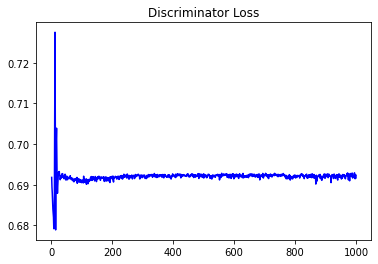

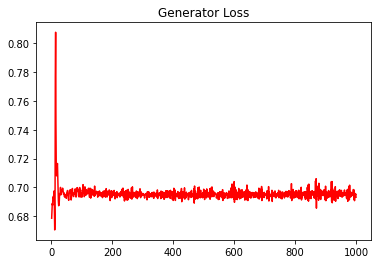

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.05643460361202738


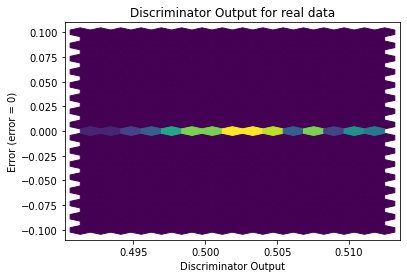

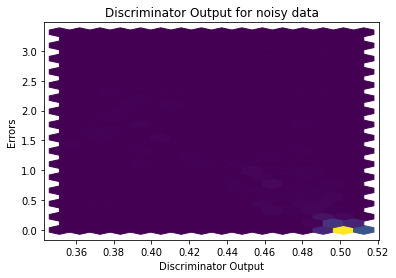

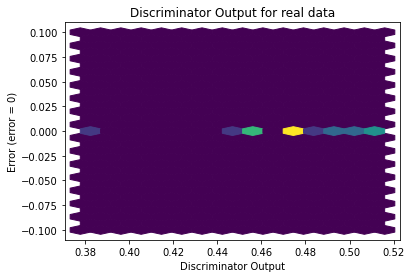

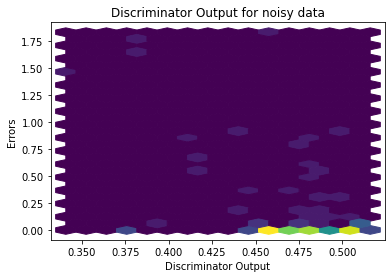

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


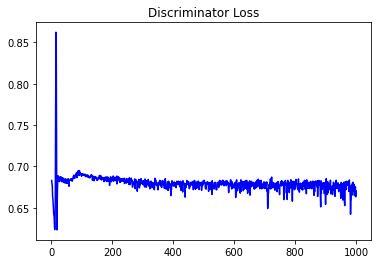

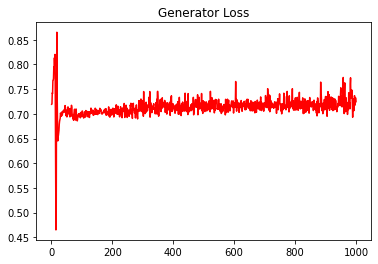

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.0862489507955379


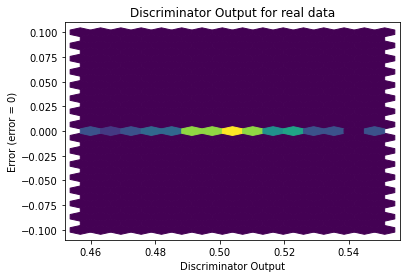

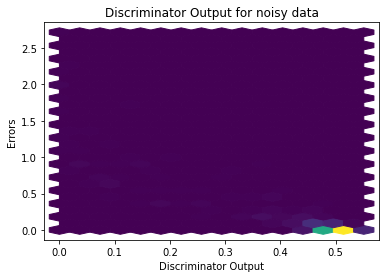

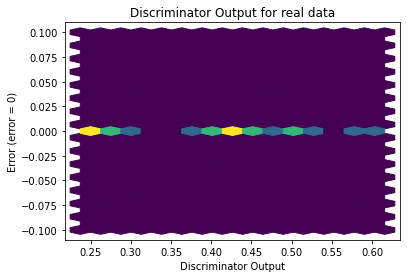

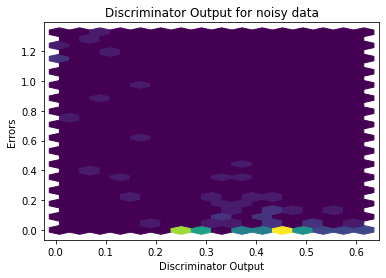

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1325]], requires_grad=True)
